## PROBLEM STATEMENT : 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Data Description:

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

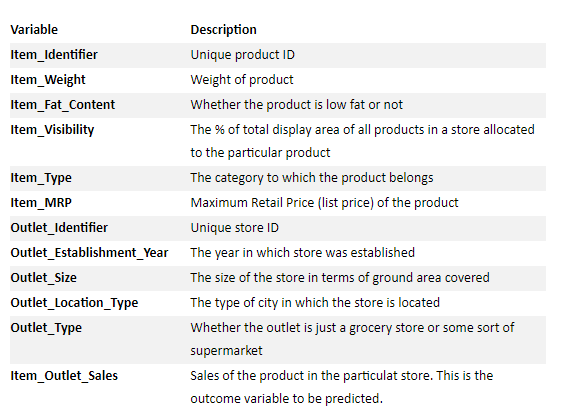

In [87]:
from IPython.display import Image
Image('data_desc.png',width=600,height=400)

In [1]:
# Imaporting Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading train data
train=pd.read_csv('Train_UWu5bXk (1).txt',sep=',')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Loading test data
test=pd.read_csv('Test_u94Q5KV (1).txt',sep=',')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [5]:
# Merging train and test data into one dataframe for easier modifications and analysis
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True,sort=False)
print(data.shape)
data.head()

(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
# Creating a copy of original data 
bms=data.copy()
bms.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [7]:
bms.shape

(14204, 13)

In [8]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [89]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


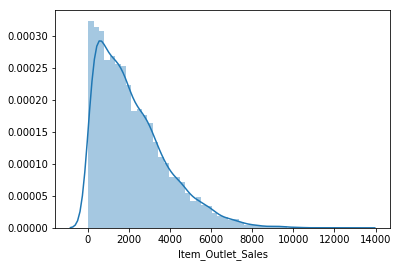

In [12]:
# Target Variable
sns.distplot(train['Item_Outlet_Sales']);

In [8]:
# Checking Null values
bms.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
# Inference: Right skewed curve implies outliers on the right end. Sales range from 0 to 14000 units

### Column: 'Item_Weight'

In [9]:
# bms['Item_Weight'] dtype is float, thus it cannot contain invalid characters.
# null Value Imputation: Finding pattern:
# Item_Identifier uniquely identifies a product.Thus,each product with same Item_identifier sould have same Item_weight
# Let's Check!
bms[bms['Item_Identifier']=='DRA12'] # for 1 Id type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772,train
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,train
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924,train
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308,train
9023,DRA12,11.6,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
12435,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
13604,DRA12,11.6,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test


In [13]:
# pattern Found!!  (Train)
# Step1: items having same Item_Id have same item weight...
# let's use this pattern to impute null values in item_weight on the basis of item_identifier
bms['Item_Weight']=bms.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))
bms['Item_Weight'].isnull().sum()

0

#### Univariate Anaysis:

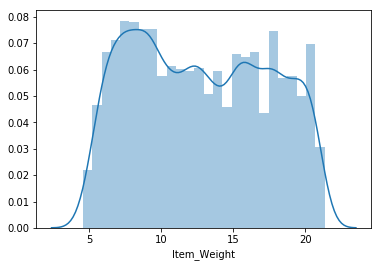

In [14]:

sns.distplot(bms['Item_Weight'])
plt.show()

In [17]:
# Observations: Multimodal distplot shows the existence of 3 or  more clusters of data on the basis of  Item_weight.
# ie items can be grouped as belonging to 5-10 units or 10-15 units or 15-20 units etc
#Item_Weight is centered around 12 units approx ,most of the items weight lie in the range of 5-20 units

In [15]:
bms['Item_Weight'].describe()

count    14204.000000
mean        12.793380
std          4.651716
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#  Item_Weight ranges from 4.5 units to 21 units approx. 

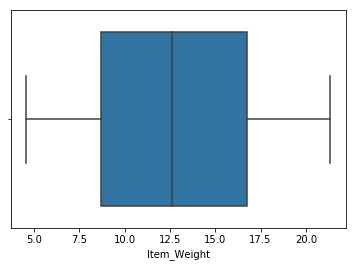

In [18]:
# Our observation is verified by the boxplot-- No outliers!
sns.boxplot(bms['Item_Weight'])
plt.show()

### Bivariate Analysis: 

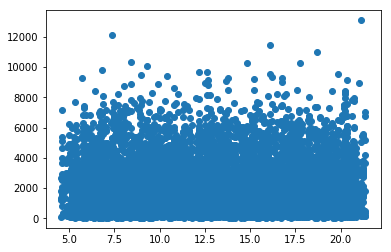

In [19]:
# Thought process : Item weight can have significant impact on sales..
# ie low weight items are usually bought more frequently (eg : biscuits,toothpaste, etc) 
# as compared to heavy weight items like TV, fridge etc
# let's validate our Thought process by observing their relationship through graphs
plt.scatter(bms['Item_Weight'],bms['Item_Outlet_Sales'])
plt.show()

In [16]:
# No such pattern is observed.. ie heavier items as well as lighter items are have almost equal impact on sales.

In [21]:
bms.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

### Column: 'Item_Fat_Content'  -  Maintaing Data Consistency 

In [17]:
bms['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [18]:
#  Maintaing Data Consistency :
# Here, LF ~ low fat ~ Low Fat
# and Regular ~ reg
d={'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
bms['Item_Fat_Content']=bms['Item_Fat_Content'].replace(d)

In [19]:
bms['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

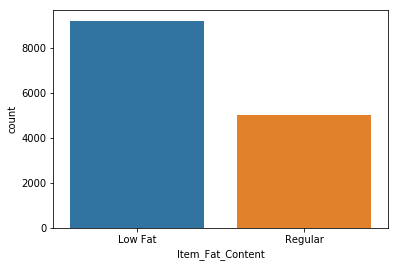

In [20]:
#### Univariate Analysis:
sns.countplot('Item_Fat_Content',data=bms)
plt.show()

In [26]:
# Inference: low fat items are purchased more as compared to Regular items

                   count         mean          std      min       25%  \
Item_Fat_Content                                                        
Low Fat           5517.0  2157.711534  1697.973824  33.2900  826.2578   
Regular           3006.0  2224.561170  1721.480865  33.9558  857.5504   

                        50%         75%         max  
Item_Fat_Content                                     
Low Fat           1765.0358  3050.69560  13086.9648  
Regular           1844.5989  3198.66965  12117.5600  


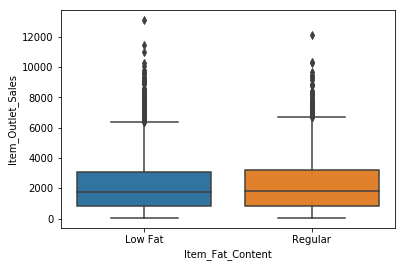

In [23]:
### Bivariate Analysis:
print(bms.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe())
sns.boxplot(bms['Item_Fat_Content'],bms['Item_Outlet_Sales'])

In [24]:
# items  with Item_Fat_Content : Low fat and Regular have almost same impact on Sales

In [28]:
bms.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

### Column: 'Item_Visibility'

In [25]:
# Checking for Null values
bms.Item_Visibility.isnull().sum()

0

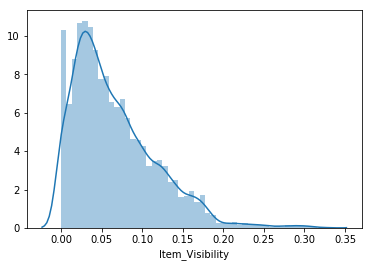

In [30]:
# 'Item_Visibility' - data cleaning not required
sns.distplot(bms['Item_Visibility'])

In [31]:
# Inference: Most of the items occupy 0 to 20% of store's area. Majority of items are small and may be daily use items..


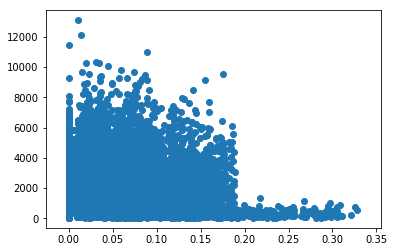

In [32]:
plt.scatter(bms['Item_Visibility'],bms['Item_Outlet_Sales'])
plt.show()

In [33]:
# Items with 0 to 20 % of visible area in the stores are purchased more frequently (also impact sales more)..
#ie daily use items
# Further, distplot shows a lot of items with item_visibility=0% which might be incorrect!

In [26]:
bms[bms['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,train
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,train
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872,train
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,NaN,Tier 2,Supermarket Type1,4604.6728,train
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,NaN,Tier 2,Supermarket Type1,5305.0944,train


In [28]:
bms[bms['Item_Identifier']=='NCD19']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
522,NCD19,8.93,Low Fat,0.022060,Household,56.0614,OUT010,1998,NaN,Tier 3,Grocery Store,276.3070,train
802,NCD19,8.93,Low Fat,0.000000,Household,55.4614,OUT045,2002,NaN,Tier 2,Supermarket Type1,331.5684,train
2129,NCD19,8.93,Low Fat,0.013179,Household,55.1614,OUT046,1997,Small,Tier 1,Supermarket Type1,939.4438,train
2907,NCD19,8.93,Low Fat,0.013254,Household,56.4614,OUT017,2007,NaN,Tier 2,Supermarket Type1,828.9210,train
3428,NCD19,8.93,Low Fat,0.000000,Household,53.2614,OUT049,1999,Medium,Tier 1,Supermarket Type1,552.6140,train
8672,NCD19,8.93,Low Fat,0.013116,Household,53.7614,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
10467,NCD19,8.93,Low Fat,0.013177,Household,55.9614,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN,test
13900,NCD19,8.93,Low Fat,0.013233,Household,53.7614,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test


### Item_type

In [35]:
bms['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [ ]:
# Most frequently stored items types are: Fruits and Vegetables, Snack Foods, Household , Frozen Foods 

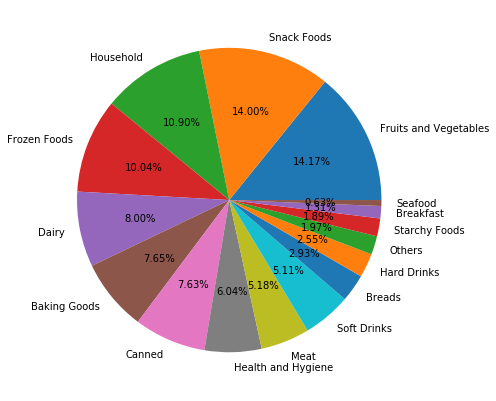

In [36]:
temp=bms['Item_Type'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(x=temp,labels=temp.index,autopct='%1.2f%%')
plt.show()

##### 'fruits and vegetables' are the most frequently sold products followed by 'Snack foods','Household and 'Frozen foods'

In [30]:
bms['Item_Outlet_Sales'].groupby(bms['Item_Type']).sum().round(2).sort_values(ascending=False)

Item_Type
Fruits and Vegetables    2820059.82
Snack Foods              2732786.09
Household                2055493.71
Frozen Foods             1825734.79
Dairy                    1522594.05
Canned                   1444151.49
Baking Goods             1265525.34
Health and Hygiene       1045200.14
Meat                      917565.61
Soft Drinks               892897.72
Breads                    553237.19
Hard Drinks               457793.43
Starchy Foods             351401.25
Others                    325517.61
Breakfast                 232298.95
Seafood                   148868.22
Name: Item_Outlet_Sales, dtype: float64

In [38]:
# Fruits and Vegetables, Snack Foods, Household contribute maximum to Sales (these were also most frequently bought)
# for a store to generate good sales, these items should be kept in stock in the inventory

In [39]:
bms.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [40]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


### Item_MRP

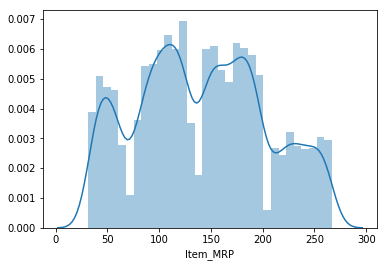

In [41]:
sns.distplot(bms['Item_MRP'])

In [31]:
# Inference: Item MRP shows a multimodal dsitribution implying that atleast 4 different groups of item_outlet data
# exists on the basis of Item MRP

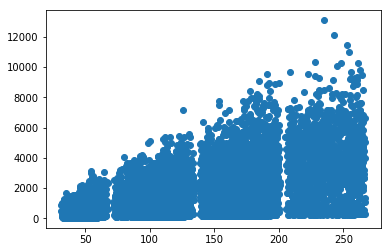

In [42]:
# Multimodal curve
plt.scatter(bms['Item_MRP'],bms['Item_Outlet_Sales'])

In [ ]:
# these groups are contributing separately to the sales

In [36]:
# for same item_id item_mrp should be equal.. let's check
bms[(bms['Item_Identifier']=='FDX07')]
#bms.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380,train
1491,FDX07,19.2,Regular,0.022914,Fruits and Vegetables,181.195,OUT035,2004,Small,Tier 2,Supermarket Type1,2380.235,train
2459,FDX07,19.2,Regular,0.022965,Fruits and Vegetables,181.695,OUT045,2002,NaN,Tier 2,Supermarket Type1,2563.330,train
3089,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,184.595,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.995,train
5906,FDX07,19.2,Regular,0.022954,Fruits and Vegetables,184.495,OUT049,1999,Medium,Tier 1,Supermarket Type1,4028.090,train
7735,FDX07,19.2,Regular,0.022808,Fruits and Vegetables,183.495,OUT027,1985,Medium,Tier 3,Supermarket Type3,4577.375,train
9054,FDX07,19.2,Regular,0.023048,Fruits and Vegetables,183.495,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
12074,FDX07,19.2,Regular,0.022919,Fruits and Vegetables,183.995,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
12561,FDX07,19.2,Regular,0.022900,Fruits and Vegetables,185.095,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test


In [ ]:
#bms[(bms['Item_Identifier']=='FDX07')&(bms['Outlet_Identifier']=='OUT045')]

In [44]:
# since item mrp for same ids is not equal this implies that.. it is a consolidated mrp= per unit price * quantity

#### Feature Engineering:

In [45]:
bms['Item_per_unit_price']=bms['Item_MRP']/bms['Item_Weight']

In [46]:
bms.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_per_unit_price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,6.031512


In [47]:
bms[bms['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_per_unit_price
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,26.861204
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,train,26.904215
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,train,26.721419
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,train,26.839699
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,train,26.764430
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,train,26.947226
6696,FDA15,9.3,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,train,26.828946
7543,FDA15,9.3,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,train,26.753677
9638,FDA15,9.3,Low Fat,0.016022,Dairy,249.9092,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,26.871957


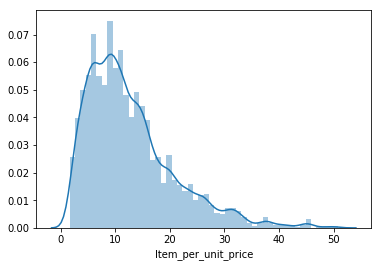

In [48]:
sns.distplot(bms['Item_per_unit_price'])

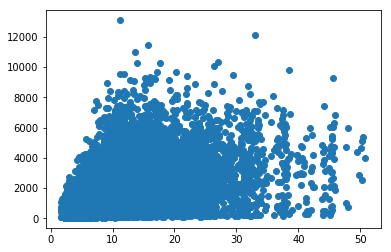

In [49]:
plt.scatter(bms['Item_per_unit_price'],bms['Item_Outlet_Sales'])

In [50]:
## Item per unit price is showing HeteroSkedasticity!!!
## ie variance of price wrt sales keeps on changing

In [51]:
bms.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_per_unit_price'],
      dtype='object')

### Column: 'Outlet_Identifier'

In [52]:
bms['Outlet_Identifier'].nunique()

10

In [53]:
bms['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

#### Q) Which outlet generated maximum sales??

In [37]:
total_sum=bms['Item_Outlet_Sales'].sum()
t=bms['Item_Outlet_Sales'].groupby(bms['Outlet_Identifier']).sum()/total_sum*100
t=t.reset_index()
t.columns=['Outlet_Identifier','%age_Item_Outlet_Sales']
t.sort_values(by='%age_Item_Outlet_Sales',ascending=False)

,Outlet_Identifier,%age_Item_Outlet_Sales
5,OUT027,18.578359
6,OUT035,12.200030
9,OUT049,11.747378
2,OUT017,11.658602
1,OUT013,11.525196
8,OUT046,11.394658
7,OUT045,10.955364
3,OUT018,9.960789
0,OUT010,1.013065
4,OUT019,0.966558


Index(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049'],
      dtype='object', name='Outlet_Identifier')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

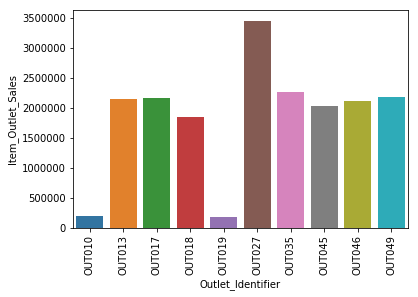

In [57]:
t=bms['Item_Outlet_Sales'].groupby(bms['Outlet_Identifier']).sum()
sns.barplot(t.index,t,ci=None)
plt.xticks(rotation=90)
plt.show()

In [38]:
# Outlet 27 genetated maximum sale in 2013 ...approx 18.5 % of total sales by Big mart, followed by Outlet 35, 49, 17, 13  and 46

#### Q) What items does Outlet 27 sold (to know why its sales have been maximum ) ??

In [56]:
bms[bms['Outlet_Identifier']=='OUT027']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_per_unit_price
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,5.671695
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train,13.714697
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train,17.383572
36,FDV20,20.200,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916,train,6.339990
38,FDX10,6.385,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614,train,5.792858
39,FDB34,15.250,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950,train,5.745561
62,FDF09,6.215,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024,train,6.160064
64,FDY45,17.500,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560,train,14.619177
84,FDR12,12.600,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752,train,13.601302
87,FDQ49,20.200,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230,train,7.720941


In [57]:
# Outlet 27 is a 'Medium' sized outlet , supermarket type 3 opened in Tier 3 city

In [58]:
# outlet 27 procures all these item types... which on the whole generate maximum sales
bms[bms['Outlet_Identifier']=='OUT027']['Item_Type'].value_counts()

Snack Foods              220
Fruits and Vegetables    220
Household                170
Frozen Foods             155
Dairy                    125
Canned                   120
Baking Goods             119
Health and Hygiene        95
Meat                      80
Soft Drinks               80
Breads                    45
Hard Drinks               40
Others                    30
Starchy Foods             30
Breakfast                 20
Seafood                   10
Name: Item_Type, dtype: int64

In [40]:
bms[bms['Outlet_Identifier']=='OUT027'].groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Item_Type
Fruits and Vegetables    576028.1886
Snack Foods              513088.1172
Household                378299.5704
Frozen Foods             316272.3108
Canned                   272150.4106
Dairy                    262317.2104
Baking Goods             224172.1968
Meat                     216288.4590
Health and Hygiene       199084.1870
Soft Drinks              147822.2476
Breads                   110518.8052
Hard Drinks               78957.8878
Breakfast                 50432.3526
Starchy Foods             49170.6616
Others                    40513.9300
Seafood                   18809.5158
Name: Item_Outlet_Sales, dtype: float64

In [59]:
# Most of the prodcuts in Out27 are most frequently bought and which contribute greater to sales (as seen in Item_type analysis)

In [60]:
bms.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_per_unit_price'],
      dtype='object')

### Column : Outlet_Establishment_Year

In [41]:
bms['Outlet_Establishment_Year'].head()

0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64

In [42]:
# this is a specific column and may not be of much use in analysis...
#but the age of a store ie how long it has been opened is an important Factor

#### Feature Engineering

In [43]:
# since we have the sales data of 2013..as per problem statement
bms['Outlet_age']=2013-bms['Outlet_Establishment_Year']
bms.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26


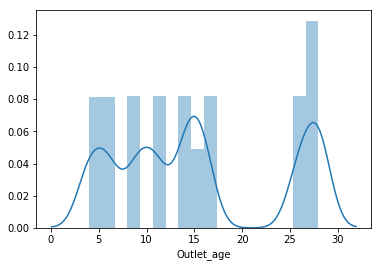

In [44]:
sns.distplot(bms['Outlet_age'])

In [45]:
# Again a multimodal outlet age distribution implies that there are different groups of outlets  
# most of the outlets are 5 or 10 or 15 or 27 yrs old

In [46]:
bms['Outlet_age'].nunique()

9

In [47]:
bms['Outlet_age'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_age, dtype: int64

#### Bivariate Analysis

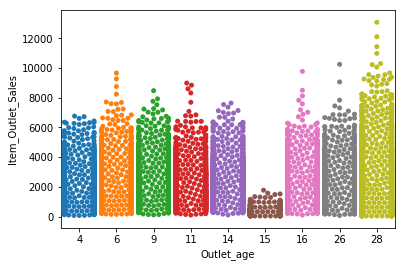

In [69]:
sns.swarmplot(bms['Outlet_age'],bms['Item_Outlet_Sales'])

In [70]:
# Item Outlet Sales are maximum for Outlet that has been there for longest ie ..28 yrs
# let's check which outlets have age 28yrs
bms[bms['Outlet_age']==28]['Outlet_Identifier'].unique()

array(['OUT027', 'OUT019'], dtype=object)

In [71]:
#  OUT27  which generated maximum sales is one of the oldest operating stores..
# so no.of years since establishment plays an important role.
# But Out19 which is also the oldest operating store has reported minimum sales (as checked before)... 
#so there may be other factors involved for lower sales..Lets check!

bms[bms['Outlet_Identifier']=='OUT019']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_per_unit_price,Outlet_age
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train,6.947987,28
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train,3.010028,28
49,FDS02,10.195,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,train,19.311368,28
59,FDI26,5.940,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,train,30.308822,28
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,train,3.294787,28
77,FDN48,13.350,Low Fat,0.113720,Baking Goods,89.9804,OUT019,1985,Small,Tier 1,Grocery Store,643.1628,train,6.740105,28
83,NCL18,18.850,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408,train,10.324329,28
95,FDU04,7.930,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,train,15.137629,28
108,DRE60,9.395,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160,train,23.988505,28
112,FDW39,6.690,Regular,0.064625,Meat,176.9370,OUT019,1985,Small,Tier 1,Grocery Store,176.4370,train,26.447982,28


In [72]:
# outlet 19 is a small sized grocery store opened in a Tier 1 city
bms[bms['Outlet_Identifier']=='OUT019']['Item_Type'].unique()
# Item types sold are mostly the same in OUTlet27 and 19.. 
# so the difference might be due to size, location and type of store

array(['Baking Goods', 'Canned', 'Dairy', 'Frozen Foods', 'Household',
       'Soft Drinks', 'Meat', 'Health and Hygiene',
       'Fruits and Vegetables', 'Snack Foods', 'Others', 'Breads',
       'Hard Drinks', 'Breakfast', 'Seafood', 'Starchy Foods'],
      dtype=object)

In [73]:
temp=bms.groupby('Outlet_Identifier')['Outlet_age'].mean()
temp

Outlet_Identifier
OUT010    15
OUT013    26
OUT017     6
OUT018     4
OUT019    28
OUT027    28
OUT035     9
OUT045    11
OUT046    16
OUT049    14
Name: Outlet_age, dtype: int64

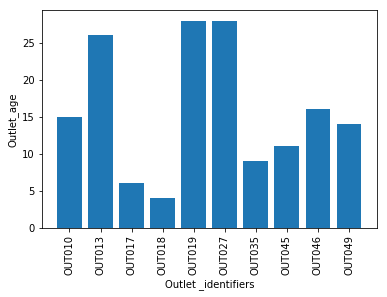

In [74]:
plt.bar(temp.index,temp)
plt.xticks(rotation=90)
plt.xlabel('Outlet _identifiers')
plt.ylabel('Outlet_age')
plt.show()

In [75]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
Item_per_unit_price          14204 non-null float64
Outlet_age                   14204 non-null int64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.6+ MB


### Column: 'Outlet_Size'

#### Null Value Imputation:

In [76]:
bms[bms['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_per_unit_price,Outlet_age
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,9.484115,15
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train,5.985963,11
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train,9.782365,6
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train,3.531231,6
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train,7.680776,15
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,train,2.898473,15
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,train,5.218129,11
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004,train,27.741464,15
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,train,7.821551,11
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972,train,26.522260,11


In [77]:
# thoughtprocess: Outlet size would depend upon outlet type.. lets check
bms['Outlet_Size'].groupby(bms['Outlet_Type']).value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [68]:
bms['Outlet_Size'].isnull().sum()

4016

In [69]:
bms[bms['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

# only outlet sizes with outlet type Grocery Store', 'Supermarket Type1 are null..
# since both of them take mostly "small" as the outlet size, thus we will impute 'Small'

Supermarket Type1    3091
Grocery Store         925
Name: Outlet_Type, dtype: int64

In [70]:
# Since Outlet type : Grocery store have only 'Small'- Outlet Sizes,
# thus I'll fill Null values in Outlet Size of type Grocery with 'Small'

In [ ]:
# To impute null values in outlet sizes of type Supermarket Type1 ,Let's try to find pattern!

In [75]:
bms[(bms['Outlet_Size'].isnull())&(bms['Outlet_Type']=='Supermarket Type1')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train,11
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train,6
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train,6
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,train,11
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,train,11
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972,train,11
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704,train,6
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656,train,6
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440,train,11
61,FDV27,7.970,Regular,0.040071,Meat,87.3514,OUT045,2002,NaN,Tier 2,Supermarket Type1,1062.6168,train,11


In [ ]:
# seems like all outlets of type-'Supermarket Type1' with Null values in Outlet Sizes are in Tier 2 cities!

In [67]:
# Let's check the outlet sizes of outlets of type Supermarket Type1 and in Tier 2 cities
bms[(bms['Outlet_Location_Type']=='Tier 2')&(bms['Outlet_Type']=='Supermarket Type1')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train,11
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train,6
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224,train,9
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,train,9
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train,6
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800,train,9
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,train,11
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,train,11
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972,train,11
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704,train,6


In [ ]:
# inference: Pattern Identified!! all these outlets have size= small..
# Thus , we can now impute all Null values in Outlet Sizes to 'Small'

In [76]:

for i in bms[bms['Outlet_Size'].isnull()].index:
    bms.loc[i,'Outlet_Size']='Small'


In [77]:
bms['Outlet_Size'].isnull().sum()

0

In [78]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
Outlet_age                   14204 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.5+ MB


#### Univariate analysis

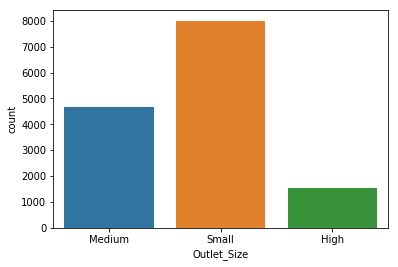

In [86]:
sns.countplot(bms['Outlet_Size'])

In [87]:
# most of the outlets are Small outlet stores 

#### Q) How different sized stores contribute to the sales

In [79]:
temp=bms['Item_Outlet_Sales'].groupby(bms['Outlet_Size']).sum().round(3).sort_values(ascending=False)
temp.sort_values(ascending=False)

Outlet_Size
Small     8958743.141
Medium    7489718.692
High      2142663.578
Name: Item_Outlet_Sales, dtype: float64

In [89]:
total_sales=bms['Item_Outlet_Sales'].sum()
temp=bms['Item_Outlet_Sales'].groupby(bms['Outlet_Size']).sum()/total_sales*100
temp.sort_values(ascending=False)

Outlet_Size
Small     48.188278
Medium    40.286527
High      11.525196
Name: Item_Outlet_Sales, dtype: float64

In [90]:
# Observation: Small stores report larger sales .. followed by Medium stores... 
# But High size stores donot signifcantly contribute to sales

Outlet_Size  Outlet_Location_Type
High         Tier 3                  1553
Medium       Tier 3                  3105
             Tier 1                  1550
Small        Tier 2                  4641
             Tier 1                  2430
             Tier 3                   925
Name: Outlet_Location_Type, dtype: int64


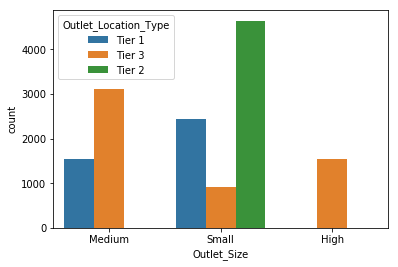

In [81]:
# Identofying the relation between Outlet_Location_Type and Outlet_Size
print(bms.groupby(['Outlet_Size'])['Outlet_Location_Type'].value_counts())
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=bms);

### Column : 'Outlet_Location_Type'

In [92]:
bms['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [82]:
bms.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_age'],
      dtype='object')

In [93]:
# maximum number if outlets are opened in tier 3 cities... Outlet 27 is also in Tier 3 city

#### Bivariate analysis

#### Q) Outlets in which type of cities yield better sales

In [94]:
bms.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()/total_sales*100

Outlet_Location_Type
Tier 1    24.108595
Tier 2    34.813996
Tier 3    41.077409
Name: Item_Outlet_Sales, dtype: float64

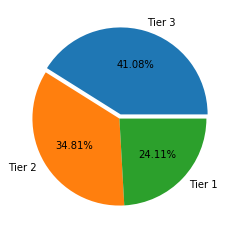

In [95]:
temp=bms.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.pie(x=temp,labels=temp.index,autopct='%1.2f%%',explode=[0.05,0,0])
plt.show()

In [96]:
# Tier 3 cities are top performers in sale

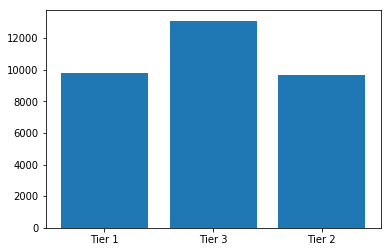

In [97]:
plt.bar(bms['Outlet_Location_Type'],bms['Item_Outlet_Sales'])
plt.show()

#### Q) Which type of stores are preferred according to type of cities?

In [98]:
bms.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          4641
Tier 3                Medium         3105
                      High           1553
                      Small           925
Name: Outlet_Size, dtype: int64

### Column : 'Outlet_Type'

In [100]:
t=bms.Outlet_Type.value_counts() # Data is already cleaned
t

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

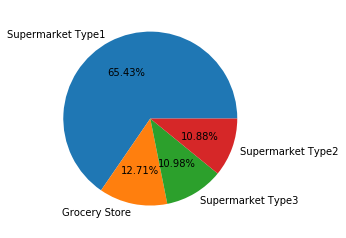

In [101]:
plt.pie(x=t,labels=t.index,autopct='%1.2f%%')
plt.show()

In [102]:
# maximum no. of stores are of 'Supermarket Type1'

In [85]:
#### Q) How is the contribution of different types of stores on sales???
bms.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().round(2).sort_values(ascending=False)
# avg sales_per_outlet_type

Outlet_Type
Supermarket Type1    12917342.26
Supermarket Type3     3453926.05
Supermarket Type2     1851822.83
Grocery Store          368034.27
Name: Item_Outlet_Sales, dtype: float64

In [104]:
# avg sales_per_outlet_type is maximum for Supermarket Type 1

### Multi-Variate Analysis

-----------------------------------------------

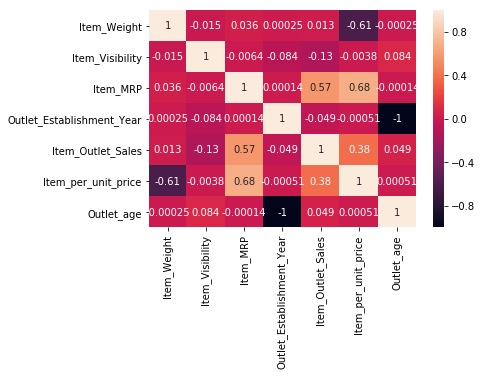

In [105]:
sns.heatmap(bms.corr(),annot=True)

In [86]:
bms.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26


## Feature Engineering:

In [92]:
# identifying pattern from Item_Identifier and extracting a new feature
bms['ItemID_category']=bms['Item_Identifier'].apply(lambda a:a[0:2])
bms['ItemID_category'] = bms['ItemID_category'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
bms['ItemID_category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: ItemID_category, dtype: int64

In [94]:
df=bms.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)

### Train - Test Split :


In [111]:
mtrain=df[df['source']=='train']
mtest=df[df['source']=='test']
mtrain=mtrain.drop('source',axis=1)
mtest=mtest.drop(['source','Item_Outlet_Sales'],axis=1)

### One Hot Encoding of Categorical features:

In [131]:
cat_cols= mtrain.dtypes[mtrain.dtypes =='object'].index
dummytrain= pd.get_dummies(mtrain)
dummytest=pd.get_dummies(mtest)

(8523, 46)
(5681, 45)


### Scaling Features using Standard Scaler:

In [132]:
from sklearn.preprocessing import StandardScaler

In [136]:
ss=StandardScaler()
scaled_xtrain=pd.DataFrame(ss.fit_transform(dummytrain.iloc[:,:-1]),columns=dummytrain.columns.drop('Item_Outlet_Sales'))
scaled_xtest=pd.DataFrame(ss.transform(dummytest),columns=dummytest.columns)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## CONCLUSION :
Following are the insights obtained after performing Exploratory Data Analysis on Big Mart Sales Dataset:

1. Item_Weight : shows a multimodal distribution ie indicates presence of groups. Null Value Imputation of Item weight is done by identifying the pattern that items having same Item_identifiers are having same weight. 
2. Item_Type: Most frequently bought items types contributes greaterv to Item_Outlet_Sales.
3. Outlet_Type: SuperMarket Type 1 reports maximum sales followed by Supermarket Type3, 2 and then grocery store.
4. Outlet_size: Small stores report larger sales, followed by Medium stores.But High size stores donot signifcantly contribute to sales. Null Value Imputation of Outlet_Size is done by identifying the pattern that outlets of type grocery have only 'Small' Sized stores, while outlets of type 'Supermarket Type 1' in Location Type - 'Tier2' (having null values) have only 'small' sized stores.
5. Tier 3 cities are top performers in terms of sales.
6. OUT27  which generated maximum sales is one of the oldest operating stores..so no.of years since establishment plays an important role.But Out19 which is also the oldest operating store has reported minimum sales (as checked before)... so there may be other factors involved for lower sales..Since, Item types sold are mostly the same in OUTlet27 and 19.. so the difference might be due to size, location and type of store.
7.  Items with 0 to 20 % of visible area in the stores are purchased more frequently (also impact sales more)...ie they can be classified as daily use items
8. maximum number of outlets are opened in tier 3 cities... Outlet 27 is also in Tier 3 city
9. Item MRP shows multimodal distribution implying clusters of data present.
10. Most of the prodcuts in Out27 are most frequently bought and which contribute greater to sales (as seen in Item_type analysis)